# Lab 4.05 - Bivariate Analysis of Qualitative Data


In [31]:
# Importing the necessary packages
import numpy as np  # "Scientific computing"
import scipy.stats as stats  # Statistical tests

import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

## Exercise 5 - Survey of Australian Students

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [32]:
df = pd.read_csv(
    "../data/survey.csv"  # , keep_default_na=False
)  # keep_default_na=False prevents changing None to NaN

df.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [33]:
df["Exer"].unique()

array(['Some', nan, 'Freq'], dtype=object)

In [34]:
df["Smoke"].unique()

array(['Never', 'Regul', 'Occas', 'Heavy', nan], dtype=object)

In [35]:
exer_type = CategoricalDtype(categories=["None", "Some", "Freq"], ordered=True)
df["Exer"] = df["Exer"].astype(exer_type)

smoke_type = CategoricalDtype(
    categories=["Never", "Occas", "Regul", "Heavy"], ordered=True
)
df["Smoke"] = df["Smoke"].astype(smoke_type)

df.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

<Axes: ylabel='Exer'>

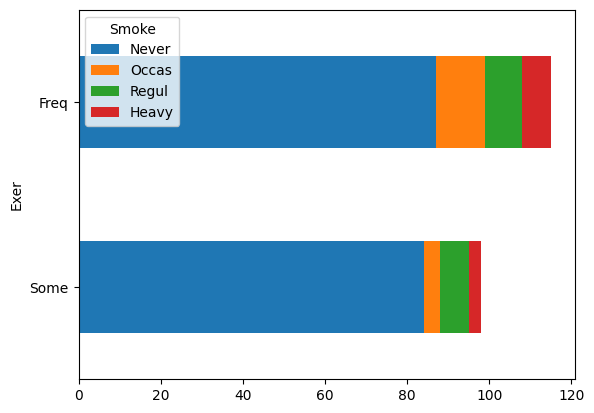

In [36]:
observed = pd.crosstab(df.Exer, df.Smoke)
observed.plot(kind="barh", stacked=True)
# i don't expect a big X² value, there doesn't appear to be a relation on the first sight.

In [37]:
observed

Smoke,Never,Occas,Regul,Heavy
Exer,,,,
Some,84,4,7,3
Freq,87,12,9,7


In [38]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
# Calculate critical value
g = stats.chi2.isf(alpha, df=dof)
print("Critical value     : %.4f" % g)
print("p-value           : %.4f" % p)

Chi-squared       : 4.5750
Degrees of freedom: 3
Critical value     : 7.8147
p-value           : 0.2057


W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

['Right' 'Left' nan]
['R on L' 'L on R' 'Neither']


<Axes: ylabel='W.Hnd'>

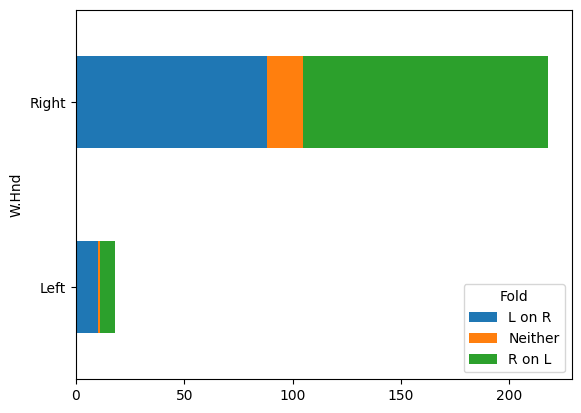

In [39]:
print(df["W.Hnd"].unique())
print(df["Fold"].unique())

observed = pd.crosstab(df["W.Hnd"], df["Fold"])


observed.plot(kind="barh", stacked=True)

In [40]:
observed

Fold,L on R,Neither,R on L
W.Hnd,,,
Left,10,1,7
Right,88,17,113


In [41]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
# Calculate critical value
g = stats.chi2.isf(alpha, df=dof)
print("Critical value     : %.4f" % g)
print("p-value           : %.4f" % p)

Chi-squared       : 1.5814
Degrees of freedom: 2
Critical value     : 5.9915
p-value           : 0.4535


Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

['Female' 'Male' nan]
['Never', 'Regul', 'Occas', 'Heavy', NaN]
Categories (4, object): ['Never' < 'Occas' < 'Regul' < 'Heavy']


<Axes: ylabel='Sex'>

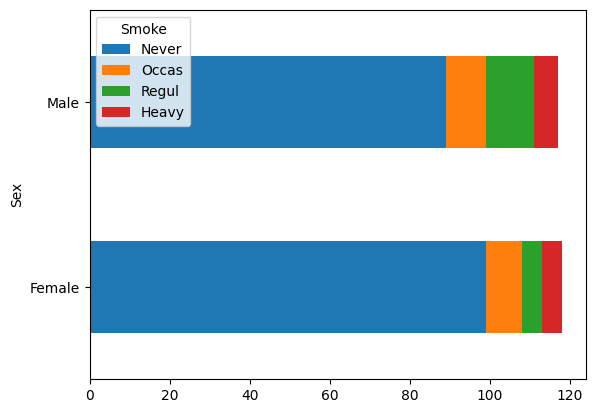

In [42]:
print(df["Sex"].unique())
print(df["Smoke"].unique())

observed = pd.crosstab(df["Sex"], df["Smoke"])

observed.plot(kind="barh", stacked=True)

In [43]:
observed

Smoke,Never,Occas,Regul,Heavy
Sex,,,,
Female,99,9,5,5
Male,89,10,12,6


In [44]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
# Calculate critical value
g = stats.chi2.isf(alpha, df=dof)
print("Critical value    : %.4f" % g)
print("p-value           : %.4f" % p)

Chi-squared       : 3.5536
Degrees of freedom: 3
Critical value    : 7.8147
p-value           : 0.3139


Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

['Female' 'Male' nan]
['Right' 'Left' nan]


<Axes: ylabel='Sex'>

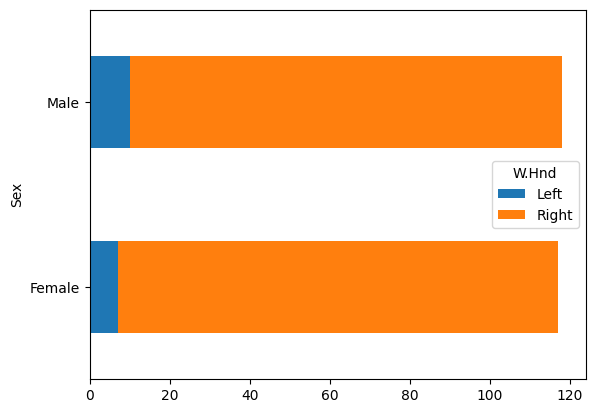

In [45]:
print(df["Sex"].unique())
print(df["W.Hnd"].unique())

observed = pd.crosstab(df["Sex"], df["W.Hnd"])

observed.plot(kind="barh", stacked=True)

In [46]:
observed

W.Hnd,Left,Right
Sex,,
Female,7,110
Male,10,108


In [47]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
# Calculate critical value
g = stats.chi2.isf(alpha, df=dof)
print("Critical value    : %.4f" % g)
print("p-value           : %.4f" % p)

Chi-squared       : 0.2356
Degrees of freedom: 1
Critical value    : 3.8415
p-value           : 0.6274
